In [10]:
import pandas as pd
import matplotlib.pyplot as plt
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [12]:
fruits.pop('fruit_label')
fruits.head()

,fruit_name,fruit_subtype,mass,width,height,color_score
0,apple,granny_smith,192,8.4,7.3,0.55
1,apple,granny_smith,180,8.0,6.8,0.59
2,apple,granny_smith,176,7.4,7.2,0.60
3,mandarin,mandarin,86,6.2,4.7,0.80
4,mandarin,mandarin,84,6.0,4.6,0.79


In [21]:
fruits.pop('fruit_subtype')
fruits.head()

,fruit_name,mass,width,height,color_score
0,apple,192,8.4,7.3,0.55
1,apple,180,8.0,6.8,0.59
2,apple,176,7.4,7.2,0.60
3,mandarin,86,6.2,4.7,0.80
4,mandarin,84,6.0,4.6,0.79


In [22]:
print(fruits.shape)

(59, 5)


In [23]:
print(fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [24]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


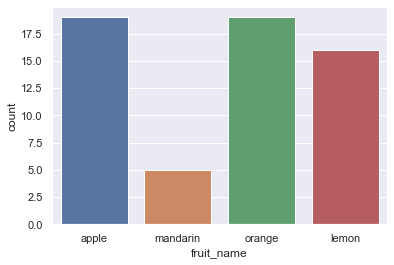

In [25]:
import seaborn as sns
sns.countplot(fruits['fruit_name'],label="Count")
plt.show()

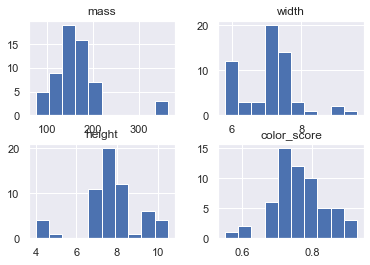

In [26]:
from matplotlib import pyplot
# histograms
#Create histogram of each input variable to get an idea of the distribution.
fruits.hist()
pyplot.show()
#It looks like perhaps color score has a near Gaussian distribution.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


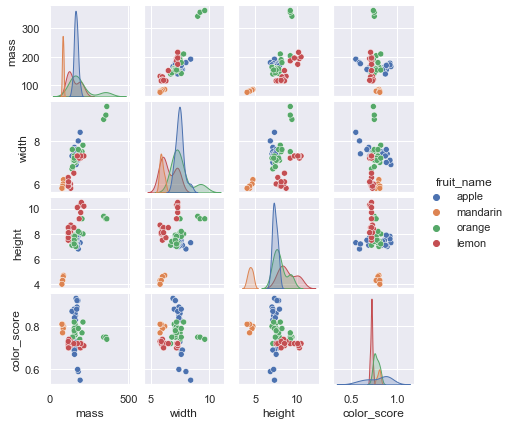

In [27]:
sns.set()
sns.pairplot(fruits,hue='fruit_name', size=1.5);

In [28]:
# descriptions
fruits.describe()
#We can see that the numerical values do not have the same scale. 
#We will need to apply scaling to the test set that we computed for the training set.

,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000
mean,163.118644,7.105085,7.693220,0.762881
std,55.018832,0.816938,1.361017,0.076857
min,76.000000,5.800000,4.000000,0.550000
25%,140.000000,6.600000,7.200000,0.720000
50%,158.000000,7.200000,7.600000,0.750000
75%,177.000000,7.500000,8.200000,0.810000
max,362.000000,9.600000,10.500000,0.930000


In [30]:
X= fruits.drop('fruit_name', axis=1)
X.shape

(59, 4)

In [31]:
y=fruits['fruit_name']
y.shape

(59,)

In [32]:
#Create Training and Test Sets and Apply Scaling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [35]:
from sklearn.naive_bayes import GaussianNB
#Choose a model and fit it on training data (learning)
model= GaussianNB()
model.fit(X_train, y_train)
#predict on the test data
y_predicition = model.predict(X_test)
#Evaluate the preformance
print(accuracy_score(y_test, y_predicition))
print(confusion_matrix(y_test, y_predicition))
print(classification_report(y_test, y_predicition))

0.6666666666666666
[[4 0 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [4 1 0 3]]
              precision    recall  f1-score   support

       apple       0.50      1.00      0.67         4
       lemon       0.67      1.00      0.80         2
    mandarin       1.00      1.00      1.00         1
      orange       1.00      0.38      0.55         8

    accuracy                           0.67        15
   macro avg       0.79      0.84      0.75        15
weighted avg       0.82      0.67      0.64        15

